In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy
import scipy.stats as sc
from scipy.cluster.hierarchy import linkage,leaves_list

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import os

In [2]:
def elapsedtime_to_sec(el):
    tab = el.split(":")
    return float(tab[0])*60+float(tab[1])
#because x264 output is "m:s", where m is the number of minutes and s the number of seconds 

res_dir = "../res_ugc/"

v_names = sorted(os.listdir(res_dir)) # so we keep the same ids between two launches

listVideo = []

for v in v_names:
    data = pd.read_table(res_dir+v, delimiter = ',')
    data['etime'] = [*map(elapsedtime_to_sec, data['elapsedtime'])]
    listVideo.append(data)

In [3]:
#our variable of interest
predDimension = "size"

# RQ1 - Input sensitivity

## RQ1.1 - Do the same options have the same effect on all inputs?

In [4]:
nbVideos = len(listVideo)

# Pearson correlation matrix
#corrPearson= [[0 for x in range(nbVideos)] for y in range(nbVideos)]
# Spearman correlation matrix
corrSpearman= [[0 for x in range(nbVideos)] for y in range(nbVideos)]
# Kullback-Leibler divergence matrix
#divKL = [[0 for x in range(nbVideos)] for y in range(nbVideos)]

for i in range(nbVideos):
    for j in range(nbVideos):
        if (i == j):
            #corrPearson[i][j] = 1
            corrSpearman[i][j] = 1
            #divKL[i][j] = 0
        else:
            #corrPearson[i][j] = np.corrcoef(listVideo[i][predDimension],listVideo[j][predDimension])[0,1]
            corrSpearman[i][j] = scipy.stats.spearmanr(listVideo[i][predDimension],listVideo[j][predDimension]).correlation
            #divKL[i][j] = sc.entropy(pk=listVideo[i][predDimension], qk=listVideo[j][predDimension])

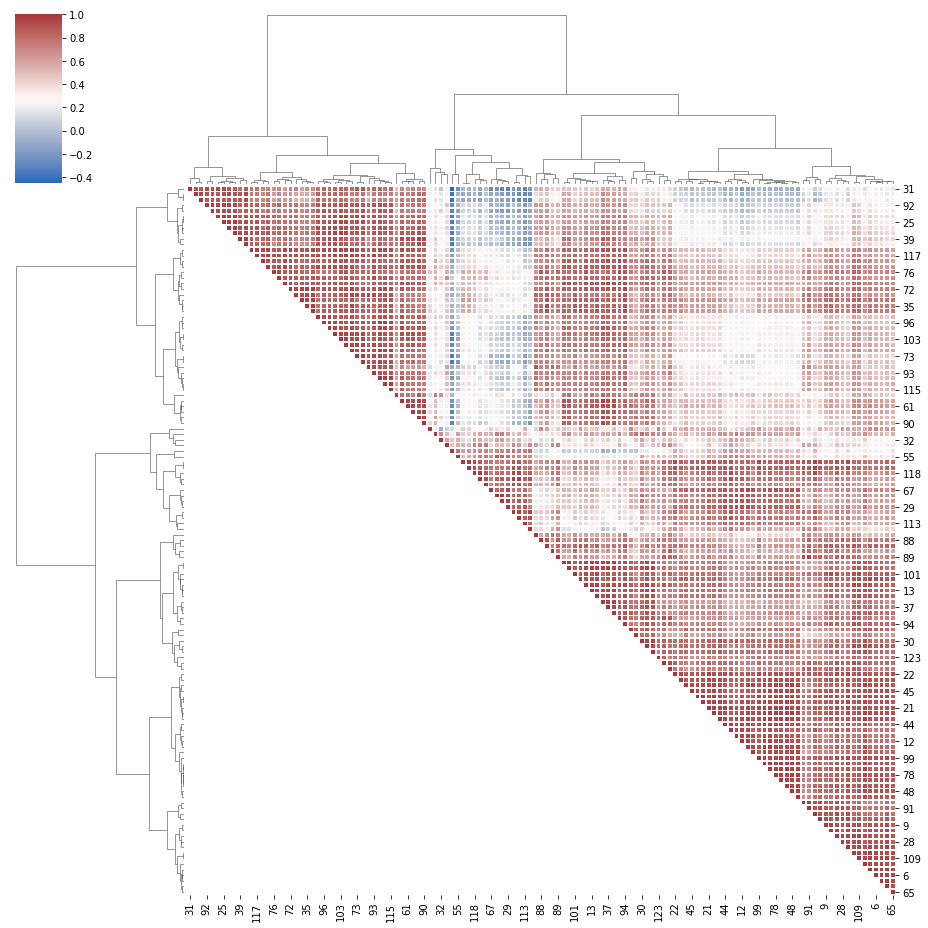

In [5]:
result_dir = "../results/"

def plot_correlationmatrix_dendogram(corr, img_name, method, ticks, div=False):

    df = pd.DataFrame(corr)
    
    # group the videos
    links = linkage(df, method=method,)
    order = leaves_list(links)
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    
    for i in range(nbVideos):
        for j in range(nbVideos):
            if i>j:
                mask[order[i]][order[j]] = True
    
    if div:
        # the KL divergence is not symetric
        # div(x,y) is slightly different from div(y,x)
        sns.clustermap(df, cmap="vlag", method=method,
                   linewidths=.75, figsize=(13, 13), cbar_kws={"ticks":ticks})
    else:
        #the correlation is symetric so it's useless to print the bottom-left diagonal
        sns.clustermap(df, cmap="vlag", mask=mask, method=method,
                   linewidths=.75, figsize=(13, 13), cbar_kws={"ticks":ticks})
    #to only print a list of ticks
    #g.ax_heatmap.set_yticklabels([k.get_text() if int(k.get_text()) in id_short else '' for k in g.ax_heatmap.get_yticklabels() ])
    #g.ax_heatmap.set_xticklabels([k.get_text() if int(k.get_text()) in id_short else '' for k in g.ax_heatmap.get_xticklabels() ])
    plt.savefig(result_dir+img_name)
    plt.show()

method = 'ward'

plot_correlationmatrix_dendogram(corrSpearman, 
                                 "corrmatrix-ugc-dendo-Spearman-" + predDimension + ".pdf", 
                                 method, 
                                 [k/5 for k in np.arange(-10,10,1)])

In [6]:
corrDescription = [corrSpearman[i][j] for i in range(nbVideos) for j in range(nbVideos) if i >j]
pd.Series(corrDescription).describe()

count    8001.000000
mean        0.600110
std         0.264939
min        -0.449659
25%         0.427972
50%         0.654211
75%         0.813269
max         0.991441
dtype: float64

In [7]:
def plot_simple_correlationmatrix_dendogram(corr, img_name, method, ticks, id_names):

    df = pd.DataFrame(corr)
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    
    for i in range(shortnbVideos):
        for j in range(shortnbVideos):
            if i>j:
                mask[i][j] = True
    fig = plt.figure(figsize=(10, 8.5))
    ax = fig.add_subplot(1,1,1)
    sns.heatmap(df, cmap="vlag", mask=mask,
               linewidths=.75, cbar_kws={"ticks":ticks})
    plt.yticks(np.arange(0,len(id_names),1)+0.5, id_names)
    plt.xticks(np.arange(0,len(id_names),1)+0.5, id_names)
    plt.savefig(result_dir+img_name)
    plt.show()

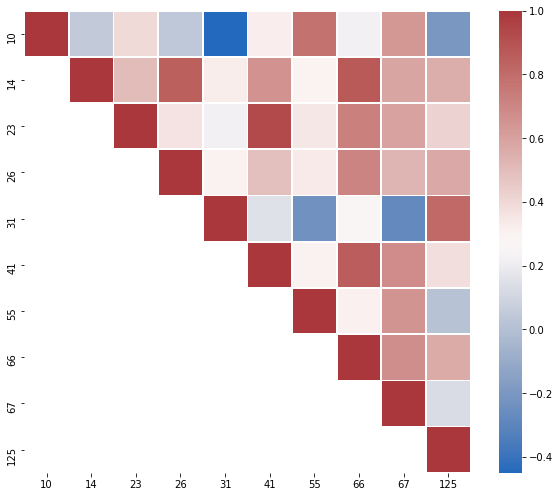

In [8]:
id_short = [10, 14, 23, 26, 31, 41, 55, 66, 67, 125]
short_v_names = [v_names[k] for k in id_short]

shortlistVideo = []
for v in short_v_names:
    data = pd.read_table(res_dir+v, delimiter = ',')
    data['etime'] = [*map(elapsedtime_to_sec, data['elapsedtime'])]
    shortlistVideo.append(data)
    
shortnbVideos = len(shortlistVideo)

shortcorrSpearman= [[0 for x in range(shortnbVideos)] for y in range(shortnbVideos)]


for i in range(shortnbVideos):
    for j in range(shortnbVideos):
        if (i == j):
            shortcorrSpearman[i][j] = 1
        else:
            shortcorrSpearman[i][j] = scipy.stats.spearmanr(listVideo[id_short[i]][predDimension],listVideo[id_short[j]][predDimension]).correlation

plot_simple_correlationmatrix_dendogram(shortcorrSpearman, 
                     "corrmatrix-ugc-dendo-Spearman-short-" + predDimension + ".png", 
                    method, 
                     [k/5 for k in np.arange(-10,10,1)],
                                      id_short)

# RQ1-2

### Shortlist

In [9]:
id_short

[10, 14, 23, 26, 31, 41, 55, 66, 67, 125]

In [10]:
shortlistVideo[0] # video 10

,configurationID,cabac,ref,deblock,analyse,me,subme,mixed_ref,me_range,trellis,...,aq-mode,size,usertime,systemtime,elapsedtime,cpu,frames,fps,kbs,etime
0,1,0,1,0:0:0,0:0,dia,0,0,16,0,...,0,12539810,4.75,0.83,0:01.13,493,480,618.64,5010.91,1.13
1,101,1,2,1:0:0,0x3:0x113,hex,6,1,16,1,...,1,9483826,20.33,0.85,0:02.93,723,480,185.02,3789.74,2.93
2,102,1,2,1:0:0,0x3:0x113,hex,6,1,16,1,...,0,4052577,15.89,1.09,0:02.48,684,480,223.37,1619.41,2.48
3,103,1,2,0:0:0,0x3:0x3,umh,6,1,16,1,...,0,4238256,18.89,1.00,0:02.36,840,480,235.82,1693.61,2.36
4,104,1,16,1:0:0,0x3:0x113,hex,6,1,24,1,...,1,17839928,48.24,1.27,0:04.33,1142,480,120.50,7128.84,4.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,97,1,2,1:0:0,0x3:0x113,hex,4,1,16,0,...,1,8293799,18.00,1.15,0:02.69,711,480,204.04,3314.21,2.69
197,98,1,2,0:0:0,0x3:0x113,hex,4,0,24,0,...,1,8785145,14.04,1.05,0:02.07,728,480,277.18,3510.55,2.07
198,99,1,5,1:0:0,0x3:0x113,hex,6,1,16,1,...,1,10640644,25.47,1.01,0:02.96,894,480,179.29,4252.01,2.96
199,100,0,3,0:0:0,0x113:0x113,hex,6,1,16,1,...,1,20449775,26.24,0.97,0:02.69,1008,480,204.45,8171.74,2.69


In [11]:
listFeatures = ["cabac", "ref", "deblock", "analyse", "me", "subme", "mixed_ref", "me_range", "trellis", "8x8dct", "fast_pskip", "chroma_qp_offset", "bframes", "b_pyramid", "b_adapt", "direct", "weightb", "open_gop", "weightp", "scenecut", "rc_lookahead", "mbtree", "qpmax", "aq-mode"]

to_keep = [k for k in listFeatures]
to_keep.append(predDimension)

categorial = ['analyse', 'me', 'direct']

def compute_Importances(listVid, id_short=None):
    
    if not id_short:
        id_short = np.arange(0,len(listVid),1)
        
    listImportances = []

    for id_video in range(len(listVid)):

        df = listVid[id_video][to_keep].replace(to_replace ="None",value='0')

        df['deblock'] =[int(val[0]) for val in df['deblock']]

        for col in df.columns:
            if col not in categorial:
                arr_col = np.array(df[col],int)
                arr_col = (arr_col-np.mean(arr_col))/(np.std(arr_col)+1e-5)
                df[col] = arr_col
            else:
                df[col] = [np.where(k==df[col].unique())[0][0] for k in df[col]]
                arr_col = np.array(df[col],int)
                arr_col = (arr_col-np.mean(arr_col))/(np.std(arr_col)+1e-5)
                df[col] = arr_col

        clf = RandomForestRegressor(n_estimators=200)
        X = df.drop([predDimension],axis=1)
        y = df[predDimension]
        clf.fit(X,y)

        listImportances.append(clf.feature_importances_)

    res = pd.DataFrame({'features' : listFeatures})

    cs = 100

    for id_video in range(len(listImportances)):
        res['video_'+str(id_short[id_video])] = np.round(cs*listImportances[id_video])/cs

    res = res.set_index('features').transpose().drop(['open_gop','qpmax'],axis=1)
    return res

res = compute_Importances(shortlistVideo, id_short)
res.to_csv("../results/shortlist_features_importances.csv")

### Boxplot

In [17]:
res = compute_Importances(listVideo)

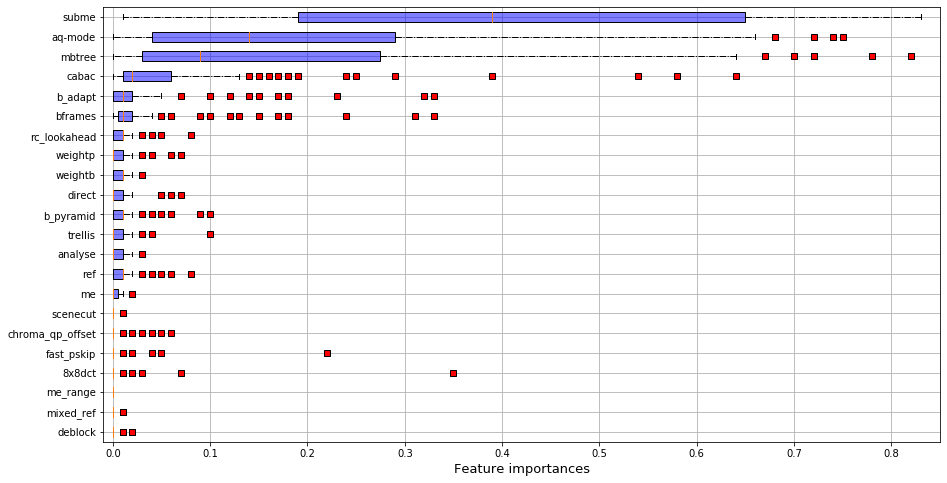

In [18]:
listImp = [(np.percentile(res[col],75), res[col], col) for col in res.columns]
listImp.sort(key=lambda tup: tup[0])


red_square = dict(markerfacecolor='r', marker='s')
plt.figure(figsize=(15,8))
plt.grid()
plt.boxplot([l[1] for l in listImp], flierprops=red_square, 
          vert=False, patch_artist=True, #widths=0.25,
          boxprops=dict(facecolor=(0,0,1,0.5),linewidth=1,edgecolor='k'),
          whiskerprops = dict(linestyle='-.',linewidth=1.0, color='black'))
plt.xlabel('Feature importances',size=13)
plt.xlim((-0.01,0.85))
plt.yticks(range(1, len(listImp) + 1), [l[2] for l in listImp])
plt.savefig("../group_paper/boxplot_features_imp_rf_size.png")
plt.show()

### Regression

In [14]:
def compute_poly(listVid, id_short=None):
    
    if not id_short:
        id_short = np.arange(0,len(listVid),1)
    
    listImportances = []
    
    #listFeatures = ['subme','aq-mode','mbtree','cabac']
    
    to_keep = [k for k in listFeatures]
    to_keep.append(predDimension)
    
    names = listFeatures
    final_names = []
    final_names.append('constant')
    for n in names:
        final_names.append(n)
    for n1 in range(len(names)):
        for n2 in range(len(names)):
            if n1>=n2:
                final_names.append(str(names[n1])+'*'+str(names[n2]))
    
    for id_video in range(len(listVid)):

        df = listVid[id_video][to_keep].replace(to_replace ="None",value='0')
        df['deblock'] =[int(val[0]) for val in df['deblock']]

        for col in df.columns:
            if col not in categorial:
                arr_col = np.array(df[col],int)
                arr_col = (arr_col-np.mean(arr_col))/(np.std(arr_col)+1e-5)
                df[col] = arr_col
            else:
                df[col] = [np.where(k==df[col].unique())[0][0] for k in df[col]]
                arr_col = np.array(df[col],int)
                arr_col = (arr_col-np.mean(arr_col))/(np.std(arr_col)+1e-5)
                df[col] = arr_col

        clf = LinearRegression()
        X = df.drop([predDimension],axis=1)

        y = df[predDimension]
        #poly = PolynomialFeatures(degree=1, interaction_only = False, include_bias = True)    
        #X_interact = pd.DataFrame(poly.fit_transform(X))#, columns=final_names)
        #kept_names = ['subme','aq-mode','mbtree','cabac','cabac*mbtree','aq-mode*subme','cabac*subme']
        clf.fit(X,y)
        listImportances.append(clf.coef_)

    res = pd.DataFrame({'features' : listFeatures})

    cs = 100

    for id_video in range(len(listImportances)):
        res['video_'+str(id_short[id_video])] = np.round(cs*listImportances[id_video])/cs

    res = res.set_index('features').drop(['open_gop','qpmax']).transpose()
    return res

res = compute_poly(listVideo)
res.to_csv("../results/list_features_importances_poly.csv")
res

features,cabac,ref,deblock,analyse,me,subme,mixed_ref,me_range,trellis,8x8dct,...,bframes,b_pyramid,b_adapt,direct,weightb,weightp,scenecut,rc_lookahead,mbtree,aq-mode
video_0,-0.17,0.06,-0.09,-0.05,-0.10,-0.42,0.00,-0.03,0.12,-0.02,...,-0.09,-0.06,0.19,-0.02,-0.30,-0.00,0.03,0.03,0.40,-0.51
video_1,-0.33,0.02,-0.05,-0.02,-0.13,-0.30,0.02,-0.06,0.04,-0.07,...,0.00,-0.06,0.10,0.01,-0.12,0.00,0.00,0.03,-0.41,-0.18
video_2,-0.14,0.02,-0.03,-0.03,-0.05,-0.22,-0.02,-0.05,-0.02,-0.11,...,-0.03,-0.11,0.18,0.02,-0.32,0.02,-0.03,0.05,-0.29,-0.33
video_3,-0.31,0.05,-0.04,0.00,-0.11,-0.22,0.04,-0.03,0.12,-0.11,...,-0.04,-0.05,-0.01,-0.02,-0.13,-0.04,0.02,-0.00,0.61,-0.61
video_4,-0.37,-0.04,-0.02,-0.01,-0.08,-0.08,0.02,-0.03,0.01,-0.05,...,-0.01,0.01,0.03,0.02,-0.00,-0.02,0.00,0.02,-0.74,-0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
video_122,-0.18,0.01,-0.10,-0.08,-0.05,-0.26,0.03,-0.05,0.17,-0.12,...,-0.03,0.02,-0.04,0.02,0.00,0.02,0.01,0.04,0.01,-0.70
video_123,-0.34,0.01,-0.14,-0.06,-0.10,-0.22,0.02,-0.09,0.27,-0.12,...,-0.08,-0.14,0.00,0.02,-0.17,0.07,0.02,0.09,-0.18,-0.23
video_124,-0.08,0.07,-0.09,-0.05,-0.05,-0.36,-0.02,-0.05,0.07,-0.22,...,-0.11,-0.01,0.17,-0.02,-0.31,0.03,-0.00,0.07,0.29,-0.53
video_125,-0.13,0.10,-0.14,-0.09,-0.05,-0.45,-0.01,-0.06,0.09,-0.24,...,-0.07,-0.04,0.12,0.00,-0.31,0.06,-0.00,0.07,0.31,-0.36


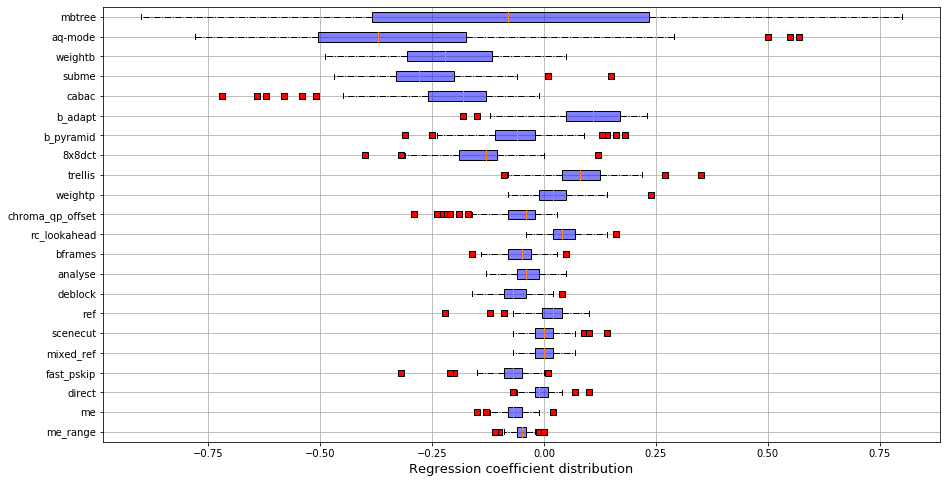

In [16]:
listImp = [(np.abs(np.percentile(res[col],75)-np.percentile(res[col],25)), res[col], col) for col in res.columns]
listImp.sort(key=lambda tup: tup[0])


red_square = dict(markerfacecolor='r', marker='s')
plt.figure(figsize=(15,8))
plt.grid()
plt.boxplot([l[1] for l in listImp], flierprops=red_square, 
          vert=False, patch_artist=True, #widths=0.25,
          boxprops=dict(facecolor=(0,0,1,0.5),linewidth=1,edgecolor='k'),
          whiskerprops = dict(linestyle='-.',linewidth=1.0, color='black'))
plt.xlabel('Regression coefficient distribution',size=13)
plt.yticks(range(1, len(listImp) + 1), [l[2] for l in listImp])
plt.savefig("../group_paper/boxplot_features_imp_linear_size.png")
plt.show()